<a href="https://colab.research.google.com/github/ClaudiaMetz/ISPC---PP1---Grupo-10/blob/main/V1_copia_Grupo_10_Denuncias_de_violencia_al_144_en_ProvBsAs%2C_CABA_y_resto_del_pa%C3%ADs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definición del problema
El objetivo es utilizador los datos de tipo de violencia, residencia y edad para construir un modelo que pueda predecir, a que edad una persona puede sufrir violencia dependiendo la ubicación donde viva, e interpretar los resultados para encontrar las provincias con más riesgo, rango de edad más vulnerables y tipo de violencia predominante.
Los datos incluyen los contactos donde denuncian un tipo de violencia y en una provincia determinada, lo que la convierte en una tarea de aprendizaje automático de regresión supervisada:


*   **Supervisado**: Tenemos acceso tanto a las funciones como al objetivo, que es entrenar un modelo que pueda aprender un mapeo entre ambos.
*   **Logistico**: porque ….

Se quiere desarrollar un modelo **Preciso** e **Interpretable**. Una vez que conocemos el objetivo, podemos usarlo para guiar nuestras decisiones mientras profundizamos en los datos y construimos el modelo.



# Lectura del dataset a trabajar

Decidimos utilizar un dataset que contiene los datos de las denuncias de diversos tipos de violencia (en su inmensa mayoría de hombres hacia mujeres) formuladas en llamados a la línea de Denuncias 144 que es de cobertura nacional. La información es desde el 2020 al 2023 (1er Semestre)


In [ ]:
#IMPORTAR EL CSV PARA TRABAJAR: "linea144-2020al2023.csv"
# Montar Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive')

# Leer el archivo y asignarlo a la variable 'victimas'
import pandas as pd
victimas = pd.read_csv('/content/drive/MyDrive/GRUPO 10 ISPC - PP1/linea144-2020al2023_V.csv', encoding='ISO-8859-1', delimiter=';')

# Crear el dataframe con la variable 'victimas'
df = pd.DataFrame(victimas)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


#PRIMERAS VISUALIZACIONES PARA VER EL ESTADO DEL DATASET

victimas = pd.read_csv('linea144-2020al2023_V.csv', encoding='ISO-8859-1', delimiter=';')

victimas.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,1/1/2020,Tucumán,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,1/1/2020,Buenos Aires,Mujer,39.0,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
2,1/1/2020,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,1/1/2020,Buenos Aires,Mujer,53.0,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,1/1/2020,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon


# Renombrar DataSet y columnas para mayor comprensión

Luego de haber cargado el DataFrame y obtener una primera vista de los datos, vamos a renombras las columnas para una mayor comprensión de las información contenida en cada una.

In [ ]:
#RENOMBRAR DATASET Y COLUMNAS DE FORMA MAS SIMPLE Y REPRESENTATIVA - IMPRIMIR 10 LÍNEAS PARA VISUALIZAR CÓMO QUEDÓ

victimas.columns

columnas = {'fecha':'Fecha','prov_residencia_persona_en_situacion_violencia':'ResidenciaVictima','genero_persona_en_situacion_de_violencia':'GeneroVictima','edad_persona_en_situacion_de_violencia':'EdadVictima','pais_nacimiento_persona_en_situacion_de_violencia':'PaisOrigenVictima','tipo_de_violencia_fisica':'ViolenciaFisica','tipo_de_violencia_psicologica':'ViolenciaPsicologica','tipo_de_violencia_sexual':'ViolenciaSexual','tipo_de_violencia_economica_y_patrimonial':'ViolenciaEconomica','tipo_de_violencia_simbolica':'ViolenciaSimbolica','tipo_de_violencia_domestica':'ViolenciaDomestica','modalidad_de_violencia_institucional':'ViolenciaInstitucional','modalidad_de_violencia_laboral':'ViolenciaLaboral','modalidad_violencia_contra_libertad_reproductiva':'ViolenciaLibertadReprod','modalidad_de_violencia_obstetrica':'ViolenciaObstetrica','modalidad_de_violencia_mediatica':'ViolenciaMediatica','modalidad_de_violencia_otras':'OtrasViolencias','vinculo_con_la_persona_agresora':'VinculoConAgresor','genero_de_la_persona_agresora':'GeneroDelAgresor'}
victimas = victimas.rename(columns=columnas)

victimas.sample(10)


,Fecha,ResidenciaVictima,GeneroVictima,EdadVictima,PaisOrigenVictima,ViolenciaFisica,ViolenciaPsicologica,ViolenciaSexual,ViolenciaEconomica,ViolenciaSimbolica,ViolenciaDomestica,ViolenciaInstitucional,ViolenciaLaboral,ViolenciaLibertadReprod,ViolenciaObstetrica,ViolenciaMediatica,OtrasViolencias,VinculoConAgresor,GeneroDelAgresor
88938,18/6/2023,Córdoba,Mujer,41.0,Argentina,No,Si,Si,No,Si,No,No,No,No,No,No,No,Otro,Varon
72619,18/9/2022,Buenos Aires,Mujer,NaN,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
21705,15/9/2020,Buenos Aires,Mujer,22.0,Venezolana,Si,Si,No,No,No,No,No,No,No,No,No,No,Pareja,Varon
70496,19/8/2022,Buenos Aires,Mujer,47.0,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
58751,25/2/2022,Buenos Aires,Mujer,60.0,Argentina,No,Si,Si,No,No,No,No,No,No,No,No,No,Otro,Varon
56298,20/1/2022,Buenos Aires,Mujer,44.0,Argentina,Si,Si,No,Si,Si,Si,No,No,No,No,No,No,Pareja,Varon
52312,24/11/2021,Buenos Aires,Mujer,NaN,Argentina,No,Si,No,No,No,No,No,No,No,No,No,No,NaN,NaN
37384,16/4/2021,Buenos Aires,Mujer,25.0,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
74019,8/10/2022,Buenos Aires,Mujer,45.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
26732,21/11/2020,San Juan,Mujer,38.0,Argentina,Si,Si,Si,Si,Si,Si,No,No,No,No,No,No,Ex pareja,Varon


# Análisis exploratorio del dataset
Ya estamos en condiciones de realizar un primer acercamiento y explorar los datos. A simple vista, podemos observar que contamos con datos faltantes, como así también columnas que no tiene el formato correcto, por ejemplo: columna 'Fecha', siendo del tipo ***objeto***, cuando debería ser ***Fecha***.

In [ ]:
#OBTENER LAS PRIMERAS INFORMACIONES DEL DATASET
#INFORMACIÓN DEL DATASET: TAMAÑO, TIPOS DE DATOS, UNA MUESTRA DE ALGUNAS LÍNEAS

victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89540 entries, 0 to 89539
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fecha                    89540 non-null  object 
 1   ResidenciaVictima        88376 non-null  object 
 2   GeneroVictima            87636 non-null  object 
 3   EdadVictima              72262 non-null  float64
 4   PaisOrigenVictima        59259 non-null  object 
 5   ViolenciaFisica          89540 non-null  object 
 6   ViolenciaPsicologica     89540 non-null  object 
 7   ViolenciaSexual          89540 non-null  object 
 8   ViolenciaEconomica       89540 non-null  object 
 9   ViolenciaSimbolica       89540 non-null  object 
 10  ViolenciaDomestica       89540 non-null  object 
 11  ViolenciaInstitucional   89540 non-null  object 
 12  ViolenciaLaboral         89540 non-null  object 
 13  ViolenciaLibertadReprod  89540 non-null  object 
 14  ViolenciaObstetrica   

Realizamos un primer vistazo a los datos para tener una idea de ellos.

In [ ]:
victimas.describe()

,EdadVictima
count,72262.000000
mean,35.688079
std,12.597016
min,1.000000
25%,27.000000
50%,34.000000
75%,42.000000
max,127.000000


# Porcentaje de datos faltantes
Además de los tipos de datos incorrectos mencionados anteriormente, podemos empezar el análisis observando el porcentaje de valores perdidos en cada columna. En este caso encontramos 63.235 datos nulos. Si bien es un número alto, para este proyecto solo se eliminarán aquellas columnas con más del 50% de valores perdidos. En este caso ninguna se encuentra por encima de dicho valor.

In [ ]:
# Calculo de valores faltantes en el df
total = victimas.isnull().sum().sort_values(ascending=False)

# Porcentaje de faltantes
percent_1 = victimas.isnull().sum()/victimas.isnull().count()*100

# Redondeo del porcentaje
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Creación del Dataframe de faltantes con valores absolutos y porcentajes
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

# Crear una leyenda personalizada
leyenda = "El total de casos nulos es: {}".format(int(total.sum()))

# Mostrar el DataFrame
print(missing_data)

# Mostrar la leyenda
print(leyenda)


                         Total     %
PaisOrigenVictima        30281  33.8
EdadVictima              17278  19.3
GeneroDelAgresor          9213  10.3
VinculoConAgresor         3395   3.8
GeneroVictima             1904   2.1
ResidenciaVictima         1164   1.3
ViolenciaLaboral             0   0.0
OtrasViolencias              0   0.0
ViolenciaMediatica           0   0.0
ViolenciaObstetrica          0   0.0
ViolenciaLibertadReprod      0   0.0
Fecha                        0   0.0
ViolenciaInstitucional       0   0.0
ViolenciaDomestica           0   0.0
ViolenciaEconomica           0   0.0
ViolenciaSexual              0   0.0
ViolenciaPsicologica         0   0.0
ViolenciaFisica              0   0.0
ViolenciaSimbolica           0   0.0
El total de casos nulos es: 63235


# Primeras observaciones
Este dataset cuenta con casi la totalidad de variables en object, sin embargo, fácilmente podemos transformarlas a numéricas porque en su gran mayoría son variables categóricas binarias. Por su parte, la variable fecha es preciso cambiarla a datatime.


*   Sería interesante analizar los llamados por fechas, para indagar si existe alguna relación en cuanto estacionalidad y festividades.
*   Es importante indagar cuál es el tipo de violencia preponderante que motiva a un llamado.
*   Conocer el origen geográfico de las llamadas puede indicar sobre qué zonas hay que incentivar el trabajo preventivo.
*   En principio, el país de nacimiento de la víctima tiene una gran cantidad de valores nulos, pero no supera el porcentaje establecido para descartar la variable, a su vez podremos comprender si existe algún tipo de vulnerabilidad adicional por la condición de migrante.

# Normalización del dataset

# Imputación de datos faltantes
Comenzando con la normalización de los datos, optamos por no eliminar los datos faltantes , por lo que serán reemplazados por la **Moda** en cada columna indicada. <br>
Luego, en la columna **EdadVictima**, utilizaremos la **Mediana** para sustituir aquellos datos vacíos o nulos.

In [ ]:
#Imputación de datos faltantes en variables categóricas - Método utilizado:Moda

mode_prov = victimas['ResidenciaVictima'].mode()[0]  # Calcula el valor moda de la columna 'ResidenciaVictima'
victimas['ResidenciaVictima'].fillna(mode_prov, inplace=True)  # Rellena los datos faltantes con el valor moda

mode_pais = victimas['PaisOrigenVictima'].mode()[0]  # Calcula el valor moda de la columna 'PaisOrigenVictima'
victimas['PaisOrigenVictima'].fillna(mode_pais, inplace=True)  # Rellena los datos faltantes con el valor moda

mode_genero_agr = victimas['GeneroDelAgresor'].mode()[0]  # Calcula el valor moda de la columna 'GeneroDelAgresor'
victimas['GeneroDelAgresor'].fillna(mode_genero_agr , inplace=True)  # Rellena los datos faltantes con el valor moda


mode_genero_vic = victimas['GeneroVictima'].mode()[0]  # Calcula el valor moda de la columna 'GeneroVictima'
victimas['GeneroVictima'].fillna(mode_genero_vic, inplace=True)  # Rellena los datos faltantes con el valor moda


mode_vinculo = victimas['VinculoConAgresor'].mode()[0]  # Calcula el valor moda de la columna 'VinculoConAgresor'
victimas['VinculoConAgresor'].fillna(mode_vinculo, inplace=True)  # Rellena los datos faltantes con el valor moda
victimas.head(10)

,Fecha,ResidenciaVictima,GeneroVictima,EdadVictima,PaisOrigenVictima,ViolenciaFisica,ViolenciaPsicologica,ViolenciaSexual,ViolenciaEconomica,ViolenciaSimbolica,ViolenciaDomestica,ViolenciaInstitucional,ViolenciaLaboral,ViolenciaLibertadReprod,ViolenciaObstetrica,ViolenciaMediatica,OtrasViolencias,VinculoConAgresor,GeneroDelAgresor
0,1/1/2020,Tucumán,Mujer,NaN,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,1/1/2020,Buenos Aires,Mujer,39.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
2,1/1/2020,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,1/1/2020,Buenos Aires,Mujer,53.0,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,1/1/2020,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
5,1/1/2020,Buenos Aires,Mujer,23.0,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
6,1/1/2020,Santiago Del Estero,Mujer,25.0,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon
7,1/1/2020,Santa Fe,Mujer,24.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
8,1/1/2020,Santa Fe,Mujer,NaN,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon
9,1/1/2020,San Juan,Mujer,21.0,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon


In [ ]:
#Imputación de datos faltantes en variable "EdadVictima" - Método utilizado: Mediana

victimas["EdadVictima"].fillna(victimas["EdadVictima"].median(), inplace = True)
victimas.EdadVictima = victimas.EdadVictima.astype(int)
victimas.head(15)

,Fecha,ResidenciaVictima,GeneroVictima,EdadVictima,PaisOrigenVictima,ViolenciaFisica,ViolenciaPsicologica,ViolenciaSexual,ViolenciaEconomica,ViolenciaSimbolica,ViolenciaDomestica,ViolenciaInstitucional,ViolenciaLaboral,ViolenciaLibertadReprod,ViolenciaObstetrica,ViolenciaMediatica,OtrasViolencias,VinculoConAgresor,GeneroDelAgresor
0,1/1/2020,Tucumán,Mujer,34,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,1/1/2020,Buenos Aires,Mujer,39,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
2,1/1/2020,Buenos Aires,Mujer,22,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,1/1/2020,Buenos Aires,Mujer,53,Argentina,No,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,1/1/2020,Buenos Aires,Mujer,38,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
5,1/1/2020,Buenos Aires,Mujer,23,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon
6,1/1/2020,Santiago Del Estero,Mujer,25,Paraguaya,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon
7,1/1/2020,Santa Fe,Mujer,24,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
8,1/1/2020,Santa Fe,Mujer,34,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon
9,1/1/2020,San Juan,Mujer,21,Argentina,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Pareja,Varon


# Transformación de variables
Para ir finalizando con la normalización de los datos, convertiremos aquellas columnas a su formato correcto, como es el caso de **Fecha** que tiene formato objeto, la transformaremos a formato **fecha**.<br>
Para poder implementar el modelo de aprendizaje, es necesario que transformemos aquellas variables **categóricas** a **binarias**.

In [ ]:
# CONVERTIR COLUMNA FECHA A FORMATO FECHA
victimas['Fecha'] = pd.to_datetime(victimas['Fecha'], format='%d/%m/%Y')


# Comprueba que la columna ahora es de tipo datetime
print(victimas['Fecha'].dtype)

datetime64[ns]


In [ ]:
# CATEGÓRICAS A BINARIAS

var1 = {'Si': 1, 'No': 0,'SI': 1}

for i in victimas.columns[5:17]:
    victimas[i] = victimas[i].map(var1)

# Ahora se ha aplicado la transformación a las columnas especificadas en el rango 5:17

victimas.info()
victimas.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89540 entries, 0 to 89539
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Fecha                    89540 non-null  datetime64[ns]
 1   ResidenciaVictima        89540 non-null  object        
 2   GeneroVictima            89540 non-null  object        
 3   EdadVictima              89540 non-null  int64         
 4   PaisOrigenVictima        89540 non-null  object        
 5   ViolenciaFisica          89540 non-null  int64         
 6   ViolenciaPsicologica     89540 non-null  int64         
 7   ViolenciaSexual          89540 non-null  int64         
 8   ViolenciaEconomica       89540 non-null  int64         
 9   ViolenciaSimbolica       89540 non-null  int64         
 10  ViolenciaDomestica       89540 non-null  int64         
 11  ViolenciaInstitucional   89540 non-null  int64         
 12  ViolenciaLaboral         89540 n

,Fecha,ResidenciaVictima,GeneroVictima,EdadVictima,PaisOrigenVictima,ViolenciaFisica,ViolenciaPsicologica,ViolenciaSexual,ViolenciaEconomica,ViolenciaSimbolica,ViolenciaDomestica,ViolenciaInstitucional,ViolenciaLaboral,ViolenciaLibertadReprod,ViolenciaObstetrica,ViolenciaMediatica,OtrasViolencias,VinculoConAgresor,GeneroDelAgresor
0,2020-01-01,Tucumán,Mujer,34,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon
1,2020-01-01,Buenos Aires,Mujer,39,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon
2,2020-01-01,Buenos Aires,Mujer,22,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon
3,2020-01-01,Buenos Aires,Mujer,53,Argentina,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon
4,2020-01-01,Buenos Aires,Mujer,38,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon
5,2020-01-01,Buenos Aires,Mujer,23,Argentina,1,1,0,1,0,1,0,0,0,0,0,0,Ex pareja,Varon
6,2020-01-01,Santiago Del Estero,Mujer,25,Paraguaya,1,1,0,1,0,1,0,0,0,0,0,0,Pareja,Varon
7,2020-01-01,Santa Fe,Mujer,24,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon


# Gráficos y estudios

# Género de la persona en situación de violencia
Como podemos observar, las comunicaciones al **144** son en un **99%** realizadas por mujeres para denunciaron algún tipo de violencia, seguido de 349 varones que informaron algún acontecimiento de violencia.

In [ ]:
# Calcular la cantidad de víctimas por género
total_genero_vic = victimas['GeneroVictima'].value_counts()

# Calcula el porcentaje de cada valor
porcentaje_genero_vic = round((total_genero_vic / total_genero_vic.sum()) * 100, 3)  # Redondea a 3 decimales

# Crea un nuevo DataFrame con los resultados y formatea la columna de porcentaje
victimas_resultado = pd.DataFrame({'Género': total_genero_vic.index,
                                  'Cant': total_genero_vic.values,
                                  '%': porcentaje_genero_vic.apply(lambda x: '{:.3f}%'.format(x))})

# Ordena el DataFrame por el conteo en orden descendente, si lo deseas
df_resultado_genero_vic = victimas_resultado.sort_values(by='Cant', ascending=False)

df_resultado_genero_vic = df_resultado_genero_vic.reset_index()
df_resultado_genero_vic = df_resultado_genero_vic.drop('index', axis=1)
df_resultado_genero_vic

,Género,Cant,%
0,Mujer,88787,99.159%
1,Varon,349,0.390%
2,Mujer Trans,141,0.157%
3,Transgenero,128,0.143%
4,Otro,67,0.075%
5,TransgÃ©nero,23,0.026%
6,Varón Trans,13,0.015%
7,Varon Trans,12,0.013%
8,Travesti,11,0.012%
9,Intersexual,4,0.004%


# Edad persona en situación de violencia
La concentración se encuentra entre las edades de 30-35 años, posiblemente pueda deberse a ...

In [ ]:
import plotly.express as px
# Gráfico de Edad de Víctimas
fig= px.box(victimas['EdadVictima'])
#Mostramos el gráfico
fig.show()

# País de Nacimiento de la persona en situación de violencia

El **93%** de las personas en situación de violencia son de origen **Argentino**, seguido de personas que migran provenientes de **Paraguay, Bolivia y Perú.**

In [ ]:
total_pais_vic = victimas['PaisOrigenVictima'].value_counts()

# Calcula el porcentaje de cada valor
porcentaje_pais_vic = round((total_pais_vic / total_pais_vic.sum()) * 100)

# Crea un nuevo DataFrame con los resultados
df_resultado_pais = pd.DataFrame({'País': total_pais_vic.index,
                             'Conteo': total_pais_vic.values,
                             'Porcentaje': porcentaje_pais_vic})

# Ordena el DataFrame por el conteo en orden descendente, si lo deseas
df_resultado_pais_vic = df_resultado_pais.sort_values(by='Conteo', ascending=False)

df_resultado_pais_vic = df_resultado_pais_vic.reset_index()
df_resultado_pais_vic = df_resultado_pais_vic.drop('index', axis=1)
df_resultado_pais_vic

,País,Conteo,Porcentaje
0,Argentina,83223,93.0
1,Paraguaya,2553,3.0
2,Boliviana,1290,1.0
3,Peruana,989,1.0
4,Venezolana,476,1.0
5,Colombiana,237,0.0
6,Uruguaya,201,0.0
7,Chilena,131,0.0
8,Brasileña,128,0.0
9,Otra,111,0.0


# Análisis en base al volumen de comunicaciones
Observamos un comportamiento similar en los 4 años, obteniendo los siguientes resultados:

*   2020: Los picos están dados en los meses de **Abril, Mayo, Julio, Agosto.**
*   2021: Los picos están dados en los meses de **Marzo, Agosto, Diciembre.**
*   2022: Los picos están dados en los meses de **Marzo y Septiembre.**
*   2023: Al ser datos semestrales, vemos que el pico se observa en el mes de **Enero.**

Podemos concluir que los meses que más denuncias por situación de violencia se informan al 144 son en los meses de **Marzo**, **Abril** y **Agosto.**<br>
Posiblemente este relacionado a.....







# Cantidad de comunicaciones por violencias de género recibidas

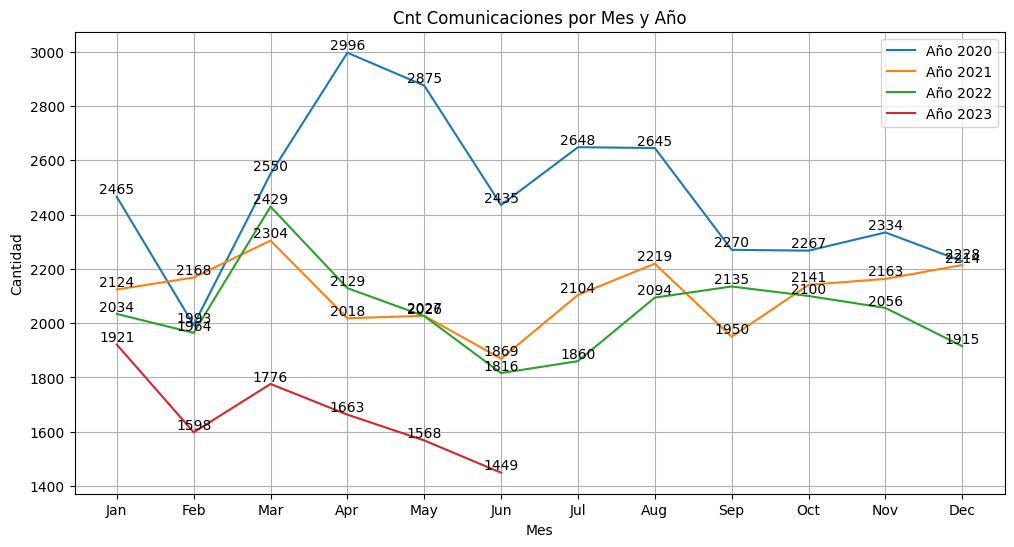

In [ ]:
# CANTIDAD DE COMUNICACIONES POR VIOLENCIAS DE GÉNERO RECIBIDAS

import calendar

victimas['Fecha'] = pd.to_datetime(victimas['Fecha'])

# Extrae el mes y el año de la columna 'Fecha'
victimas['Mes'] = victimas['Fecha'].dt.month
victimas['Año'] = victimas['Fecha'].dt.year

# Agrupa los datos por mes y año, cuenta las observaciones en cada grupo y restablece el índice
agrupado = victimas.groupby(['Año', 'Mes']).size().reset_index(name='Conteo')

# Crea una figura para el gráfico
plt.figure(figsize=(12, 6))

# Itera a través de los años únicos y crea una línea para cada año
años_unicos = agrupado['Año'].unique()
for año in años_unicos:
    datos_año = agrupado[agrupado['Año'] == año]
    # Obtén los nombres abreviados de los meses
    nombres_meses = [calendar.month_abbr[mes] for mes in datos_año['Mes']]
    plt.plot(nombres_meses, datos_año['Conteo'], label=f'Año {año}')
    # Agrega etiquetas con los valores en el gráfico
    for mes, conteo in zip(nombres_meses, datos_año['Conteo']):
        plt.text(mes, conteo, str(conteo), ha='center', va='bottom')

# Personaliza el gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Cnt Comunicaciones por Mes y Año')
plt.legend()  # Agregar leyenda con etiquetas de años
plt.grid(True)

# Muestra el gráfico
plt.show()

La gráfica nos muestra que año a año las denuncias han ido decreciendo. Lanzamos la hipótesis que puede deberse a una mayor concientización de la población en general sobre lo perjudicial que puede ser ejercer diferentes tipos de violencias y también a un cambio de paradigmas en el comportamiento (principalmente de los hombres que han sido los más denunciados).

# Promedio Diario de Comunicaciones por Mes y Año

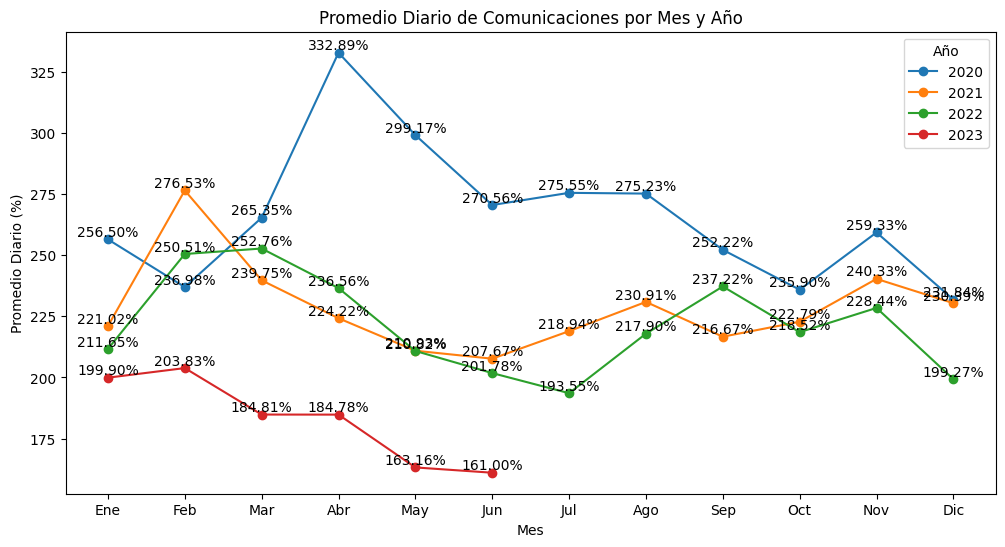

In [ ]:

victimas['Fecha'] = pd.to_datetime(victimas['Fecha'])

# Extraer el año, mes y día de las fechas
victimas['año'] = victimas['Fecha'].dt.year
victimas['mes'] = victimas['Fecha'].dt.month
victimas['dia'] = victimas['Fecha'].dt.day

# Agrupar por año, mes y día y contar el número de registros diarios
promedio_diario = victimas.groupby(['año', 'mes', 'dia']).size().reset_index(name='conteo')

# Agrupar nuevamente por año y mes y calcular el promedio diario del mes
promedio_diario_por_mes = promedio_diario.groupby(['año', 'mes'])['conteo'].mean().reset_index()

# Calcular el total de días en cada mes (puede variar ligeramente según el año)
dias_por_mes = victimas.groupby(['año', 'mes'])['dia'].nunique().reset_index()

# Calcular el promedio diario en porcentaje
promedio_diario_por_mes['promedio_porcentaje'] = (promedio_diario_por_mes['conteo'] / dias_por_mes['dia']) * 100

# Nombres de los meses
nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear un gráfico de líneas con el promedio diario en porcentaje
plt.figure(figsize=(12, 6))
for año in promedio_diario_por_mes['año'].unique():
    datos_año = promedio_diario_por_mes[promedio_diario_por_mes['año'] == año]
    plt.plot(datos_año['mes'], datos_año['promedio_porcentaje'], label=str(año), marker='o')

plt.xlabel('Mes')
plt.ylabel('Promedio Diario (%)')
plt.title('Promedio Diario de Comunicaciones por Mes y Año')
plt.xticks(range(1, 13), nombres_meses)  # Personaliza las etiquetas del eje x
plt.legend(title='Año')

for i, año in enumerate(promedio_diario_por_mes['año'].unique()):
    datos_año = promedio_diario_por_mes[promedio_diario_por_mes['año'] == año]
    for j, v in enumerate(datos_año['promedio_porcentaje']):
        # Mostrar el porcentaje con dos dígitos después de la coma
        porcentaje = "{:.2f}%".format(v)
        plt.text(j + 1, v, porcentaje, ha='center', va='bottom')

plt.show()

# Promedio diario de comunicaciones por violencia de género
Del volumen de comunicaciones, podemos encontrar que la mayor cantidad de llamadas por día se concentran en los meses de **Enero, Marzo, Abril y Mayo**, siendo **Marzo** el mes donde mas se denuncia las situaciones de violencia. Posiblemente este relacionado a que son meses en que se sale de vacaciones y las personas conviven más tiempo en un mismo espacio.

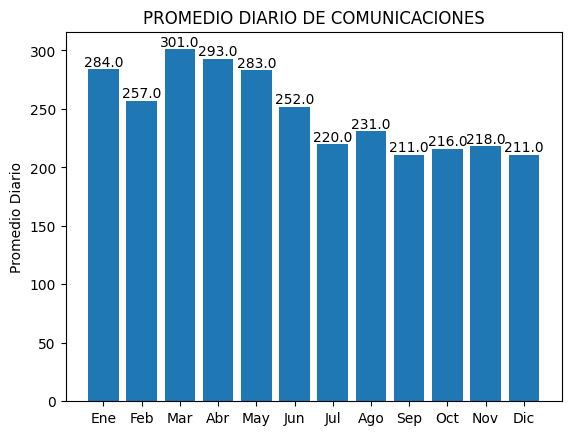

In [ ]:

# PROMEDIO DIARIO DE COMUNICACIONES POR VIOLENCIAS DE GÉNERO RECIBIDAS

victimas['Fecha'] = pd.to_datetime(victimas['Fecha'])

# Extraer el mes de las fechas
victimas['mes'] = victimas['Fecha'].dt.month

# Agrupar por mes y día del mes y calcular el promedio diario del mes
promedio_diario_por_mes = (victimas.groupby(['mes'])['Fecha'].count()/30).astype(int)

# Agrupar nuevamente por mes y calcular el promedio mensual
promedio_mensual = promedio_diario_por_mes.groupby('mes').mean()

# Nombres de los meses
nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear un gráfico de barras con el promedio mensual
plt.bar(nombres_meses, promedio_mensual)
plt.ylabel('Promedio Diario')
plt.title('PROMEDIO DIARIO DE COMUNICACIONES')

for i, v in enumerate(promedio_mensual):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Denuncias según la residencia de la víctima
Del total de comunicaciones, **Buenos Aires** es la provincia con mayor cantidad de denuncias realizadas, seguido de la **Ciudad Autónoma de Buenos Aires**.<br>
Con mucho menor cantidad, luego encontramos **Santa Fe, Tucumán y Mendoza**.

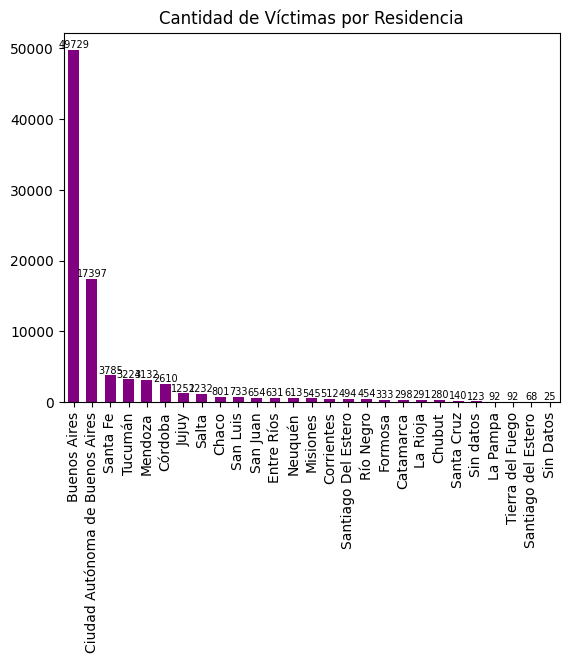

In [ ]:
#GRAFICAR LA CANTIDAD DE DENUNCIAS SEGÚN LA RESIDENCIA DE LA VÍCTIMA

victimasGrafico1 = victimas.ResidenciaVictima.value_counts()
ax = victimasGrafico1.plot.bar(color='purple',width=0.6)

# Agrega etiquetas con los valores en las barras
for i, v in enumerate(victimasGrafico1):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=7, color='black')

# Personaliza el gráfico
plt.title('Cantidad de Víctimas por Residencia')

# Muestra el gráfico
plt.show()

# Denuncias por Residencia

Observamos que:<br>
En **Buenos Aires**, las mayores situaciones de violencia están dadas por:<br>
* Violencia psicológica (47385)
* Violencia doméstica (45075)
* Violencia física (33567)<br><br>
En **Ciudad Autónoma de Buenos Aires** observamos:
* Violencia psicológica (16170)
* Violencia doméstica (15081)
* Violencia física (9139)<br><br>
En **Santa Fe** observamos:
* Violencia psicológica (3668)
* Violencia doméstica (3600)
* Violencia física (2814)<br><br>
En **Tucumán** observamos:
* Violencia doméstica (3083)
* Violencia psicológica (3071)
* Violencia física (2528)


In [ ]:
# Obtén los valores únicos de la columna 'prov_residencia_persona_en_situacion_violencia'
X = victimas['ResidenciaVictima'].unique()

# Ordena los valores únicos en orden ascendente utilizando el método sort_values() en el DataFrame original
X.sort()

sum_by_provincia_fisica = victimas.groupby('ResidenciaVictima')['ViolenciaFisica'].sum()
sum_by_provincia_psicologica = victimas.groupby('ResidenciaVictima')['ViolenciaPsicologica'].sum()
sum_by_provincia_sexual = victimas.groupby('ResidenciaVictima')['ViolenciaSexual'].sum()
sum_by_provincia_economica = victimas.groupby('ResidenciaVictima')['ViolenciaEconomica'].sum()
sum_by_provincia_simbolica = victimas.groupby('ResidenciaVictima')['ViolenciaSimbolica'].sum()
sum_by_provincia_domestica = victimas.groupby('ResidenciaVictima')['ViolenciaInstitucional'].sum()
sum_by_provincia_domestica = victimas.groupby('ResidenciaVictima')['ViolenciaLaboral'].sum()
sum_by_provincia_domestica = victimas.groupby('ResidenciaVictima')['ViolenciaDomestica'].sum()


# Crear el nuevo DataFrame a partir de las series resultantes de las agrupaciones
df_provincias_violencia = pd.DataFrame({
    'Provincia': X,
    'Sum_Viol_Fisica': sum_by_provincia_fisica,
    'Sum_Viol_Psico': sum_by_provincia_psicologica,
    'Sum_Viol_Sexual': sum_by_provincia_sexual,
    'Sum_Viol_Econom': sum_by_provincia_economica,
    'Sum_Viol_Simbol': sum_by_provincia_simbolica,
    'Sum_Viol_Domest': sum_by_provincia_domestica
})

df_provincias_violencia = df_provincias_violencia.reset_index()

df_provincias_violencia=df_provincias_violencia.drop('ResidenciaVictima', axis=1)
df_provincias_violencia

,Provincia,Sum_Viol_Fisica,Sum_Viol_Psico,Sum_Viol_Sexual,Sum_Viol_Econom,Sum_Viol_Simbol,Sum_Viol_Domest
0,Buenos Aires,33567,47385,7369,20578,22550,45076
1,Catamarca,201,277,38,131,37,262
2,Chaco,605,759,100,351,93,748
3,Chubut,189,267,31,119,43,261
4,Ciudad Autónoma de Buenos Aires,9139,16170,2019,5097,4887,15081
5,Corrientes,382,488,81,233,81,493
6,Córdoba,1813,2522,342,1205,364,2479
7,Entre Ríos,457,604,101,259,89,594
8,Formosa,256,318,53,142,48,312
9,Jujuy,969,1176,158,537,155,1195


# Cantidad de denuncias en CABA
Observamos que en los años **2020 y 2021**, prácticamente tiene la misma cantidad de llamadas: **5.270.**<br>
En **2022** se visualiza una disminución en la cantidad de casos informados al 144. <br>
También podemos decir, que la cantidad de llamadas, respecto a la población total de CABA, ronda el **0,17% anual**. Lo cual creemos que es un número bajo, posiblemente porque muchas situaciones no se informen, o la denuncia se exponga de forma presencial en alguna delegación policial.

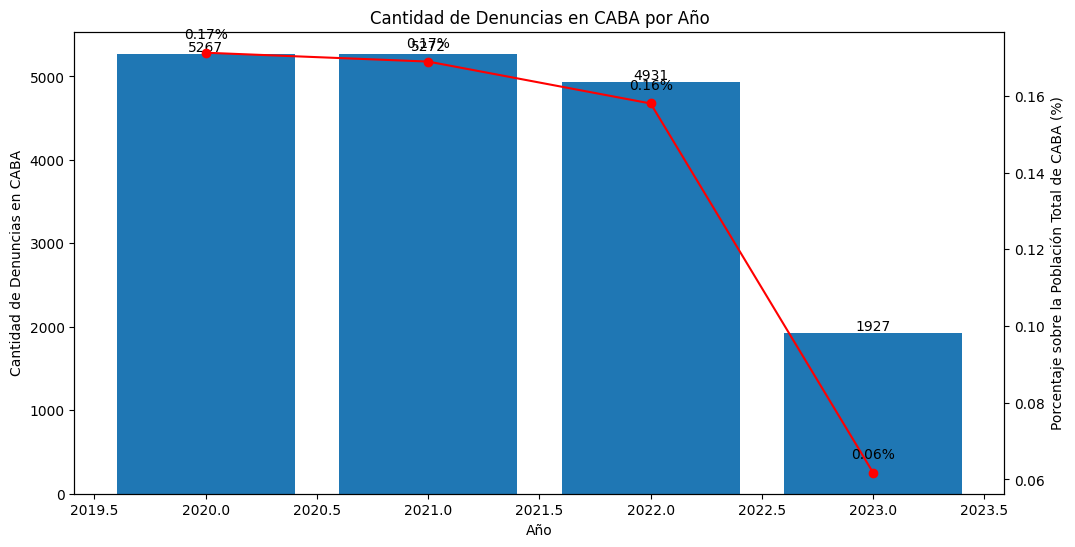

In [ ]:
#OBTENER LA CANTIDAD DE DENUNCIANTES EN CABA, SU PORCENTAJE SOBRE LA POBLACIÓN TOTAL y GRÁFICO

victimas['Fecha'] = pd.to_datetime(victimas['Fecha'])

# Filtra las filas correspondientes a la Ciudad Autónoma de Buenos Aires (CABA)
victimas_caba = victimas[victimas['ResidenciaVictima'] == 'Ciudad Autónoma de Buenos Aires']

# Calcula la cantidad de denuncias en CABA por año
cantidad_denuncias_caba = victimas_caba['Fecha'].dt.year.value_counts().sort_index()

# Define la población total de CABA para los años 2020, 2021, 2022 y 2023
poblacion_caba = {
    2020: 3075646,
    2021: 3120612,
    2022: 3120612,
    2023: 3120612
}

# Convierte el diccionario de población en una Serie de Pandas
poblacion_caba_series = pd.Series(poblacion_caba)

# Calcula el porcentaje de denuncias sobre la población total de CABA para cada año
porcentaje_denuncias_caba = (cantidad_denuncias_caba / poblacion_caba_series) * 100

# Crea un gráfico de barras con etiquetas
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(cantidad_denuncias_caba.index, cantidad_denuncias_caba.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de Denuncias en CABA')
plt.title('Cantidad de Denuncias en CABA por Año')

# Añade etiquetas con la cantidad de denuncias en cada barra
for i, v in enumerate(cantidad_denuncias_caba.values):
    plt.text(cantidad_denuncias_caba.index[i], v, str(v), ha='center', va='bottom')


# Agrega una segunda escala en el eje y para mostrar el porcentaje
ax2 = plt.twinx()
ax2.plot(cantidad_denuncias_caba.index, porcentaje_denuncias_caba, color='red', marker='o')
ax2.set_ylabel('Porcentaje sobre la Población Total de CABA (%)')

# Añade etiquetas con el valor del porcentaje en la segunda escala
for i, v in enumerate(porcentaje_denuncias_caba):
    ax2.annotate(f'{v:.2f}%', (cantidad_denuncias_caba.index[i], v), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Cantidad de denuncias en Buenos Aires
Observamos que desde el 2020, los casos denunciados han ido disminuyendo, lo cual es positivo, pudiendo deberse a ....


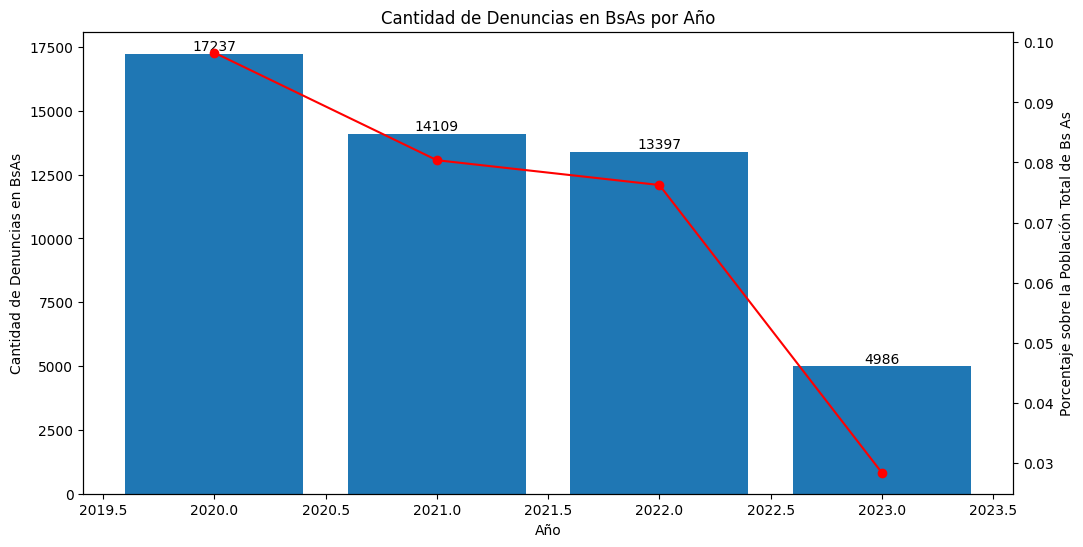

In [ ]:
#OBTENER LA CANTIDAD DE DENUNCIANTES EN PROV DE BUENOS AIRES, SU PORCENTAJE SOBRE LA POBLACIÓN TOTAL y GRÁFICO

victimas['Fecha'] = pd.to_datetime(victimas['Fecha'])

# Filtra las filas correspondientes a la PROV DE BUENOS AIRES
victimas_bsas = victimas[victimas['ResidenciaVictima'] == 'Buenos Aires']

# Calcula la cantidad de denuncias en CABA por año
cantidad_denuncias_bsas = victimas_bsas['Fecha'].dt.year.value_counts().sort_index()

# Define la población total de CABA para los años 2020, 2021, 2022 y 2023
poblacion_bsas = {
    2020: 17541141,
    2021: 17552756,
    2022: 17569053,
    2023: 17569053
}

# Convierte el diccionario de población en una Serie de Pandas
poblacion_bsas_series = pd.Series(poblacion_bsas)

# Calcula el porcentaje de denuncias sobre la población total de CABA para cada año
porcentaje_denuncias_bsas = (cantidad_denuncias_bsas / poblacion_bsas_series) * 100

# Crea un gráfico de barras con etiquetas
plt.figure(figsize=(12, 6))
bar_plot = plt.bar(cantidad_denuncias_bsas.index, cantidad_denuncias_bsas.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de Denuncias en BsAs')
plt.title('Cantidad de Denuncias en BsAs por Año')

# Añade etiquetas con la cantidad de denuncias en cada barra
for i, v in enumerate(cantidad_denuncias_bsas.values):
    plt.text(cantidad_denuncias_bsas.index[i], v, str(v), ha='center', va='bottom')

# Agrega una segunda escala en el eje y para mostrar el porcentaje
ax2 = plt.twinx()
ax2.plot(cantidad_denuncias_bsas.index, porcentaje_denuncias_bsas, color='red', marker='o')
ax2.set_ylabel('Porcentaje sobre la Población Total de Bs As')

plt.show()

In [ ]:
#SELECCIONAMOS PARA TRABAJAR LAS DENUNCIAS PRODUCIDAS EN CABA Y PROV DE BS AS QUE SON LA GRAN MAYORÍA DEL TOTAL
#ANALIZAMOS LA INTEGRIDAD DE LOS DATOS SELECCIONADOS

ResCabayProvBsAs = ['Ciudad Autónoma de Buenos Aires', 'Buenos Aires']

victimasCabayProvBsAs = victimas[victimas.ResidenciaVictima.isin(ResCabayProvBsAs)]
print(victimasCabayProvBsAs)
victimasCabayProvBsAs.count()

           Fecha                ResidenciaVictima GeneroVictima  EdadVictima  \
1     2020-01-01                     Buenos Aires         Mujer           39   
2     2020-01-01                     Buenos Aires         Mujer           22   
3     2020-01-01                     Buenos Aires         Mujer           53   
4     2020-01-01                     Buenos Aires         Mujer           38   
5     2020-01-01                     Buenos Aires         Mujer           23   
...          ...                              ...           ...          ...   
89534 2023-06-30  Ciudad Autónoma de Buenos Aires         Mujer           34   
89535 2023-06-30  Ciudad Autónoma de Buenos Aires         Mujer           53   
89537 2023-06-30  Ciudad Autónoma de Buenos Aires         Mujer           18   
89538 2023-06-30  Ciudad Autónoma de Buenos Aires         Mujer           27   
89539 2023-06-30  Ciudad Autónoma de Buenos Aires         Mujer           20   

      PaisOrigenVictima  ViolenciaFisic

Fecha                      67126
ResidenciaVictima          67126
GeneroVictima              67126
EdadVictima                67126
PaisOrigenVictima          67126
ViolenciaFisica            67126
ViolenciaPsicologica       67126
ViolenciaSexual            67126
ViolenciaEconomica         67126
ViolenciaSimbolica         67126
ViolenciaDomestica         67126
ViolenciaInstitucional     67126
ViolenciaLaboral           67126
ViolenciaLibertadReprod    67126
ViolenciaObstetrica        67126
ViolenciaMediatica         67126
OtrasViolencias            67126
VinculoConAgresor          67126
GeneroDelAgresor           67126
Mes                        67126
Año                        67126
año                        67126
mes                        67126
dia                        67126
dtype: int64

# Cantidad de denuncias por tipo de violencia

Observamos que los tipos de violencia que mas se denuncian son:


1.   Violencia Psicológica con el 94.92% (84.992 llamadas)
2.   Violencia Doméstica con el 90.84% (81.334 llamadas)
3.   Violencia Física con el 65.85% (58.964 llamadas)



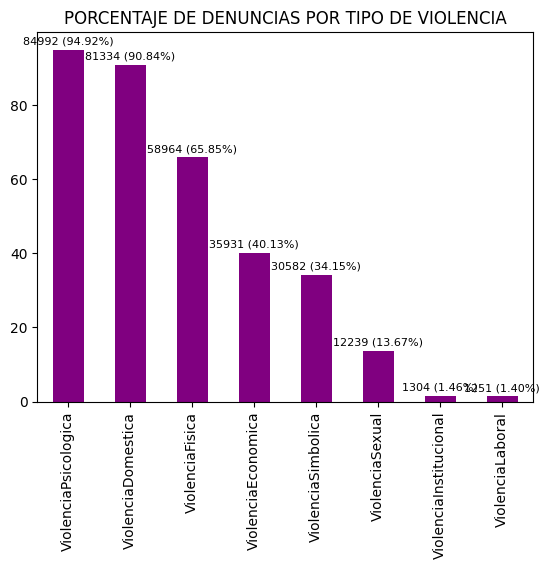

In [ ]:
#GRAFICAR LA CANTIDAD DE DENUNCIAS POR TIPO DE VIOLENCIA

# Selecciona las columnas de interés por índice (por ejemplo, Columna1 y Columna2)
indices_seleccionados = list(range(3, 14))

# Calcular los porcentajes en lugar de recuentos
porcentajes = victimas.iloc[:, indices_seleccionados].eq(1).mean() * 100
cantidades = victimas.iloc[:, indices_seleccionados].eq(1).sum()

# Filtrar las barras con datos mayores a 1
porcentajes = porcentajes[porcentajes > 1]
cantidades = cantidades[porcentajes.index]

# Ordenar las barras de mayor a menor
porcentajes = porcentajes.sort_values(ascending=False)
cantidades = cantidades[porcentajes.index]

# Crear un gráfico de barras
ax = porcentajes.plot(kind='bar', color='purple')

# Agregar etiquetas con los valores en las barras (cantidad y porcentaje)
for i, (cantidad, porcentaje) in enumerate(zip(cantidades, porcentajes)):
    ax.text(i, porcentaje + 1, f'{cantidad} ({porcentaje:.2f}%)', ha='center', va='bottom', fontsize=8, color='black')

# Personalizar el gráfico
plt.title('PORCENTAJE DE DENUNCIAS POR TIPO DE VIOLENCIA')

# Mostrar el gráfico
plt.show()

# Cantidad de denuncias por vínculo con el agresor

Las personas que realizan la denuncia a la línea 144, sufren situaciones de violencia principalmente por su **Ex pareja**, siendo atribuidos al **51%** de las llamadas.<br>
El **36%** de las comunicaciones son por violencia ejercidas por su **Pareja actual**.

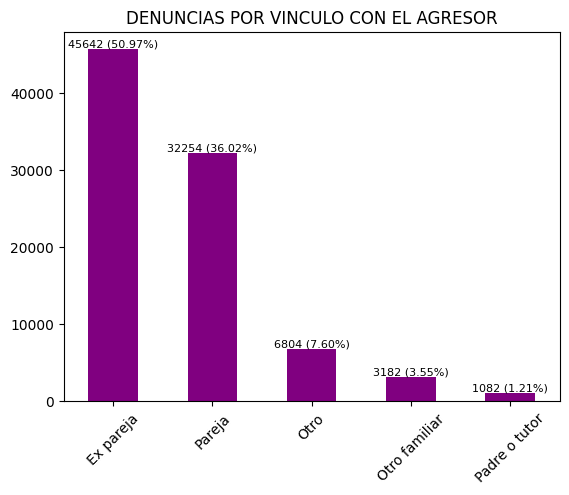

In [ ]:
#GRAFICAR LA CANTIDAD DE DENUNCIAS POR VINCULO CON EL AGRESOR

# Contar los valores únicos
conteo_valores = victimas['VinculoConAgresor'].value_counts()

# Filtrar las barras con valores mayores a 100
conteo_valores_filtrado = conteo_valores[conteo_valores > 1000]

# Crear un gráfico de barras
ax = conteo_valores_filtrado.plot(kind='bar', color='purple')

# Agregar etiquetas con los valores en las barras (cantidad y porcentaje)
total_registros = len(victimas)
for i, v in enumerate(conteo_valores_filtrado):
    porcentaje = (v / total_registros) * 100
    ax.text(i, v + 5, f'{v} ({porcentaje:.2f}%)', ha='center', va='bottom', fontsize=8, color='black')

# Rotar el nombre de las barras a 45 grados
plt.xticks(rotation=45)

# Personalizar el gráfico
plt.title('DENUNCIAS POR VINCULO CON EL AGRESOR')

# Mostrar el gráfico
plt.show()

# MODELO Y PREDICCIÓN

# Modelo de Regresión Logística

In [ ]:
# Importa las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score # para metricas del modelo

# Utilizando el DataFrame llamado 'victimas'
df = pd.DataFrame(victimas)

#1er CASO
# Definir las características (X_entrenamiento) y etiquetas (y_entrenamiento)
X_entrenamiento = victimas[['EdadVictima']]
y_entrenamiento = victimas['ViolenciaPsicologica']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento y 20% para prueba)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_entrenamiento, y_entrenamiento, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
modelo_regr = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regr.fit(X_entrenamiento, y_entrenamiento)

# Ahora evaluar y luego hacer las predicciones
y_pred = modelo_regr.predict(X_prueba)

# Calcular la precisión del modelo en los datos de prueba
precision = modelo_regr.score(X_prueba, y_prueba)

print("Precisión del modelo:", precision)

# Hacemos una predicción
victimaPred1 = pd.DataFrame({'EdadVictima': [21]})

prediccion = modelo_regr.predict_proba(victimaPred1)

print("Predicción:", prediccion)

#La salida [0.05369544 0.94630456] indica que el modelo ha predicho
#que hay una probabilidad del 5.37% de que la víctima no haya sufrido violencia psicológica (ViolenciaPsicologica = 0)
#y una probabilidad del 94.63% de que sí haya sufrido violencia psicológica (ViolenciaPsicologica = 1)


#2do CASO
# Definir las características (X_entrenamiento) y etiquetas (y_entrenamiento)
X_entrenamiento = victimas[['EdadVictima', 'ViolenciaFisica']]
y_entrenamiento = victimas['ViolenciaPsicologica']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento y 20% para prueba)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_entrenamiento, y_entrenamiento, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
modelo_regr = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regr.fit(X_entrenamiento, y_entrenamiento)

# Ahora evaluar y luego hacer las predicciones
y_pred = modelo_regr.predict(X_prueba)

# Calcular la precisión del modelo en los datos de prueba
precision = modelo_regr.score(X_prueba, y_prueba)

print("Precisión del modelo:", precision)


# Hacemos una predicción
victimaPred2 = pd.DataFrame({'EdadVictima': [21], 'ViolenciaFisica': [1]})

prediccion = modelo_regr.predict_proba(victimaPred2)

print("Predicción:", prediccion)

#La salida [0.03478111 0.96521889] indica que el modelo ha predicho
#que hay una probabilidad del 3.48% de que la víctima no haya sufrido violencia psicológica (ViolenciaPsicologica = 0)
#y una probabilidad del 96.52% de que sí haya sufrido violencia psicológica (ViolenciaPsicologica = 1)


# Otra predicción

victimaPred3 = pd.DataFrame({'EdadVictima': [21], 'ViolenciaFisica': [0]})

prediccion = modelo_regr.predict_proba(victimaPred3)

print("Predicción:", prediccion)

#La salida [0.10618904 0.89381096]] indica que el modelo ha predicho que hay una probabilidad del 10.62%
# de que la víctima no haya sufrido violencia física (ViolenciaFisica = 0) además de la psicológica
#y una probabilidad del 89.38% de que sí haya sufrido violencia física además de la psicológica (ViolenciaFisica = 1)

#SI BIEN EN EL 1er CASO Y EN EL 2do CASO LA PRECISIÓN ES LA MISMA, EL MODELO NOS DA PREDICCIONES DIFERENTES
#PORQUE UTILIZAMOS MAS DATOS.




Precisión del modelo: 0.9462809917355371
Predicción: [[0.06659837 0.93340163]]
Precisión del modelo: 0.9462809917355371
Predicción: [[0.04071707 0.95928293]]
Predicción: [[0.13248073 0.86751927]]


La violencia psicológica y la violencia física son dos formas diferentes de violencia, pero a menudo están relacionadas entre sí. La violencia psicológica puede ser un precursor de la violencia física, y la violencia física puede tener efectos psicológicos duraderos en las víctimas.

En Argentina, la Ley 26.485 define la violencia contra las mujeres como “cualquier conducta que ataque: Tu vida. Tu libertad. Tu dignidad. Tu integridad física, psicológica o sexual. Tu situación económica. Tu seguridad personal. Tu participación política”. La ley reconoce que la violencia contra las mujeres puede tomar muchas formas diferentes, incluyendo la violencia física, la violencia psicológica, la violencia sexual, la violencia económica y la violencia simbólica.

Un estudio realizado en Argentina encontró que las mujeres que habían experimentado al menos una forma de violencia psicológica tenían casi 10 veces más probabilidades de ser víctimas de violencia física o sexual por parte de su pareja actual
. Esto sugiere que la violencia psicológica y la violencia física a menudo ocurren juntas.

# Modelo de Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

# Utilizando el DataFrame llamado 'victimas'
df = pd.DataFrame(victimas)

# Extraer el año, el mes y el día de la fecha
df["año"] = df["Fecha"].dt.year
df["mes"] = df["Fecha"].dt.month
df["dia"] = df["Fecha"].dt.day

# Seleccionar las columnas predictoras
X = df[["ResidenciaVictima", "año", "mes"]]
y = df.query("(@X['año'] == año) & (@X['mes'] == mes) & (victimas['ViolenciaFisica'] == 1)").count()
# Imprimir los valores de X
print(X)

# Imprimir los valores de y
print(y)

# Imprimir los valores de X en formato de texto
print(X.to_string())

# Imprimir los valores de y en formato de texto
print(y.to_string())

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando una instancia del modelo Random Forest.
# Usando 100 árboles y el criterio de entropía.
model = RandomForestClassifier(n_estimators=100, criterion="entropy")

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba, usando el Método predict
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es: {accuracy}")

# Mostrar la matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred)
print(f"La matriz de confusión del modelo es:\n{cm}")

# Mostrar el reporte de clasificación del modelo
cr = classification_report(y_test, y_pred)
print(f"El reporte de clasificación del modelo es:\n{cr}")




UnicodeEncodeError: ignored

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

# Utilizando el DataFrame llamado 'victimas'
df = pd.DataFrame(victimas)

# Extraer el año, el mes y el día de la fecha
df["año"] = df["Fecha"].dt.year
df["mes"] = df["Fecha"].dt.month
df["dia"] = df["Fecha"].dt.day

# Perform one-hot encoding for the 'ResidenciaVictima' column
#X = pd.get_dummies(df[["año", "mes"]], columns=["ResidenciaVictima"], drop_first=True)
X = pd.get_dummies(df[["año", "mes", "ResidenciaVictima"]], drop_first=True)
y = df['ViolenciaFisica']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando una instancia del modelo Random Forest.
# Usando 100 árboles y el criterio de entropía.
modelo = RandomForestClassifier(n_estimators=100, criterion="entropy")

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba, usando el Método predict
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es: {accuracy}")

# Mostrar la matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred)
print(f"La matriz de confusión del modelo es:\n{cm}")

# Mostrar el reporte de clasificación del modelo
cr = classification_report(y_test, y_pred)
print(f"El reporte de clasificación del modelo es:\n{cr}")


La precisión del modelo es: 0.6511614920705829
La matriz de confusión del modelo es:
[[  389  5804]
 [  443 11272]]
El reporte de clasificación del modelo es:
              precision    recall  f1-score   support

           0       0.47      0.06      0.11      6193
           1       0.66      0.96      0.78     11715

    accuracy                           0.65     17908
   macro avg       0.56      0.51      0.45     17908
weighted avg       0.59      0.65      0.55     17908



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

# Utilizando el DataFrame llamado 'victimas'
#df = pd.DataFrame(victimas)
df = pd.DataFrame(victimas, columns=["Fecha", "ViolenciaFisica", "ResidenciaVictima"])

# Extraer el año, el mes y el día de la fecha
df["año"] = df["Fecha"].dt.year
df["mes"] = df["Fecha"].dt.month
df["dia"] = df["Fecha"].dt.day

# Definir una función que compruebe si los valores de las columnas año y mes coinciden con los de X
def coincide(row):
    return (row["año"] == X["año"]) & (row["mes"] == X["mes"])

# Aplicar la función a cada fila del dataframe df
df["coincide"] = df.apply(coincide, axis=1)

# Filtrar las filas donde la columna violenciaFisica sea igual a 1 y la columna coincide sea True
df = df[(df["ViolenciaFisica"] == 1) & (df["coincide"] == True)]

# Contar el número de filas que cumplen la condición
y = df.count()

# Seleccionar las columnas predictoras
X = df[["ResidenciaVictima", "año", "mes"]]





NameError: ignored

In [ ]:
# Imprimir los valores de X
print(X)

# Imprimir los valores de y
print(y)

# Imprimir los valores de X en formato de texto
print(X.to_string())

# Imprimir los valores de y en formato de texto
print(y.to_string())

NameError: ignored

In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando una instancia del modelo Random Forest.
# Usando 100 árboles y el criterio de entropía.
model = RandomForestClassifier(n_estimators=100, criterion="entropy")

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba, usando el Método predict
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"La precisión del modelo es: {accuracy}")

# Mostrar la matriz de confusión del modelo
cm = confusion_matrix(y_test, y_pred)
print(f"La matriz de confusión del modelo es:\n{cm}")

# Mostrar el reporte de clasificación del modelo
cr = classification_report(y_test, y_pred)
print(f"El reporte de clasificación del modelo es:\n{cr}")

NameError: ignored

In [ ]:
#IMPORTAR EL CSV PARA TRABAJAR: "linea144-2020al2023.csv"

from google.colab import files

uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


#PRIMERAS VISUALIZACIONES PARA VER EL ESTADO DEL DATASET

victimas = pd.read_csv('linea144-2020al2023_V.csv', encoding='ISO-8859-1', delimiter=';')

victimas.head(5)

#----------------------------------------------------

# Graficando el árbol de decisión

# Creanndo la figura
plt.figure(figsize=(12, 8))

# Graficando el árbol
plot_tree(modelo, filled=True, feature_names=["año", "mes", "ResidenciaVictima"], class_names=["1", "0"])

# Mostrando el gráfico
plt.show()